# Linear Regression_Salary_Dataset

## Importing Libraries

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Uploading the dataset

In [59]:
salary_df = pd.read_csv('Salary_dataset.csv')
salary_df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [60]:
## dropping 'unknown' coloumn

salary_df = salary_df.drop('Unnamed: 0',axis=1)
salary_df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [61]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [62]:
salary_df.memory_usage(deep=True)

Index              132
YearsExperience    240
Salary             240
dtype: int64

In [63]:
salary_df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [64]:
salary_df.duplicated().sum() ## no duplicates

0

In [65]:
salary_df.isna().sum() ## no null values

YearsExperience    0
Salary             0
dtype: int64

In [66]:
list(salary_df.columns)

['YearsExperience', 'Salary']

In [67]:
corr = salary_df[['YearsExperience', 'Salary']].corr()


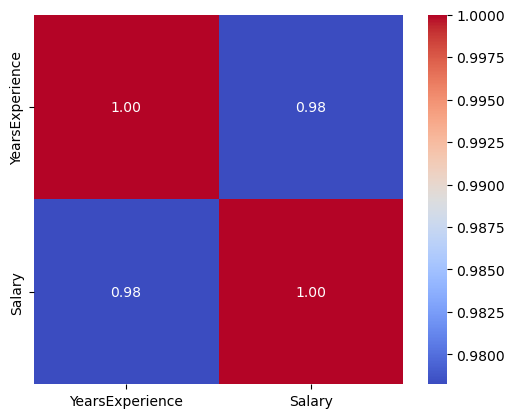

In [68]:
sns.heatmap(corr,annot=True,fmt='.2f',cmap='coolwarm',square=True)
plt.show()

In [69]:
X = salary_df['YearsExperience'].values.reshape(-1,1)
X

array([[ 1.2],
       [ 1.4],
       [ 1.6],
       [ 2.1],
       [ 2.3],
       [ 3. ],
       [ 3.1],
       [ 3.3],
       [ 3.3],
       [ 3.8],
       [ 4. ],
       [ 4.1],
       [ 4.1],
       [ 4.2],
       [ 4.6],
       [ 5. ],
       [ 5.2],
       [ 5.4],
       [ 6. ],
       [ 6.1],
       [ 6.9],
       [ 7.2],
       [ 8. ],
       [ 8.3],
       [ 8.8],
       [ 9.1],
       [ 9.6],
       [ 9.7],
       [10.4],
       [10.6]])

In [70]:
y = salary_df['Salary'].values
y

array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
        54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
        61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
        98274., 101303., 113813., 109432., 105583., 116970., 112636.,
       122392., 121873.])

In [71]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [72]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [73]:
y_pred = model.predict(X_test)

In [74]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [137]:
r2

0.9347210011126783

##### r2 score reflects 93.5% variance in the target variable depicting that the model fits the data very well.

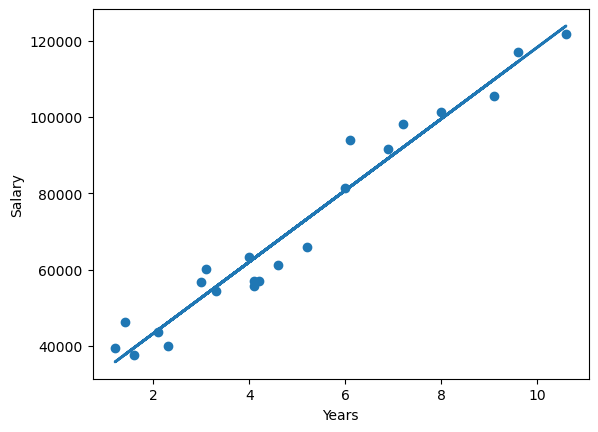

In [75]:
plt.scatter(X_train,y_train)
plt.plot(X_train,model.predict(X_train),linewidth=2)
plt.xlabel('Years')
plt.ylabel('Salary')
plt.show()

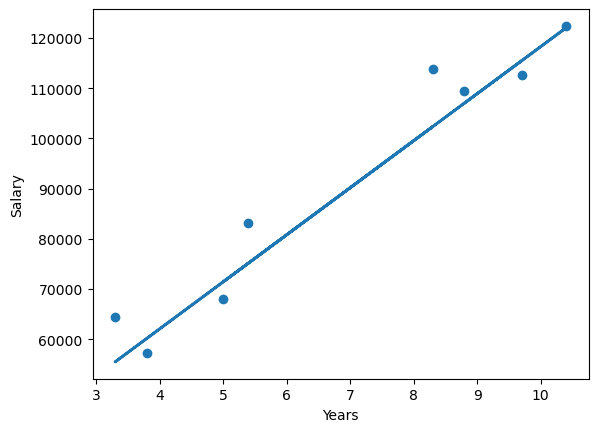

In [135]:
plt.scatter(X_test,y_test)
plt.plot(X_test,model.predict(X_test),linewidth=2)
plt.xlabel('Years')
plt.ylabel('Salary')
plt.show()